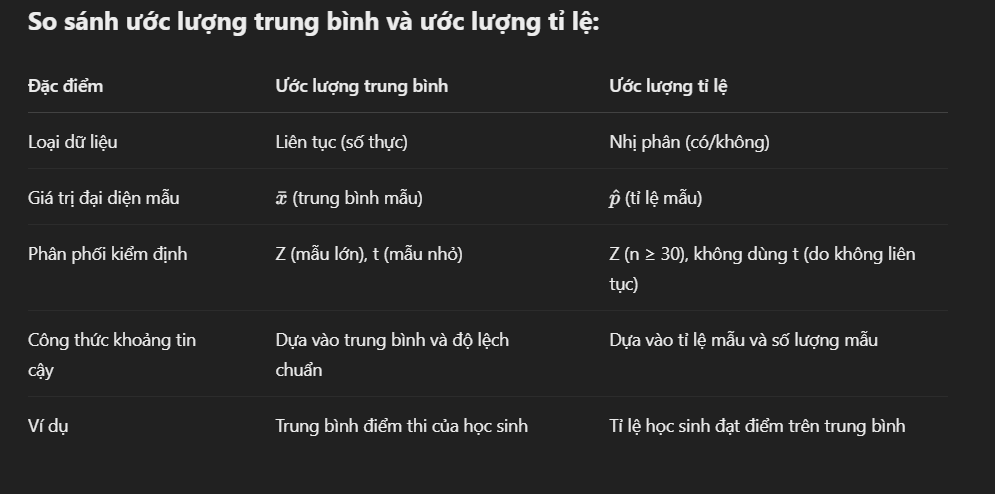

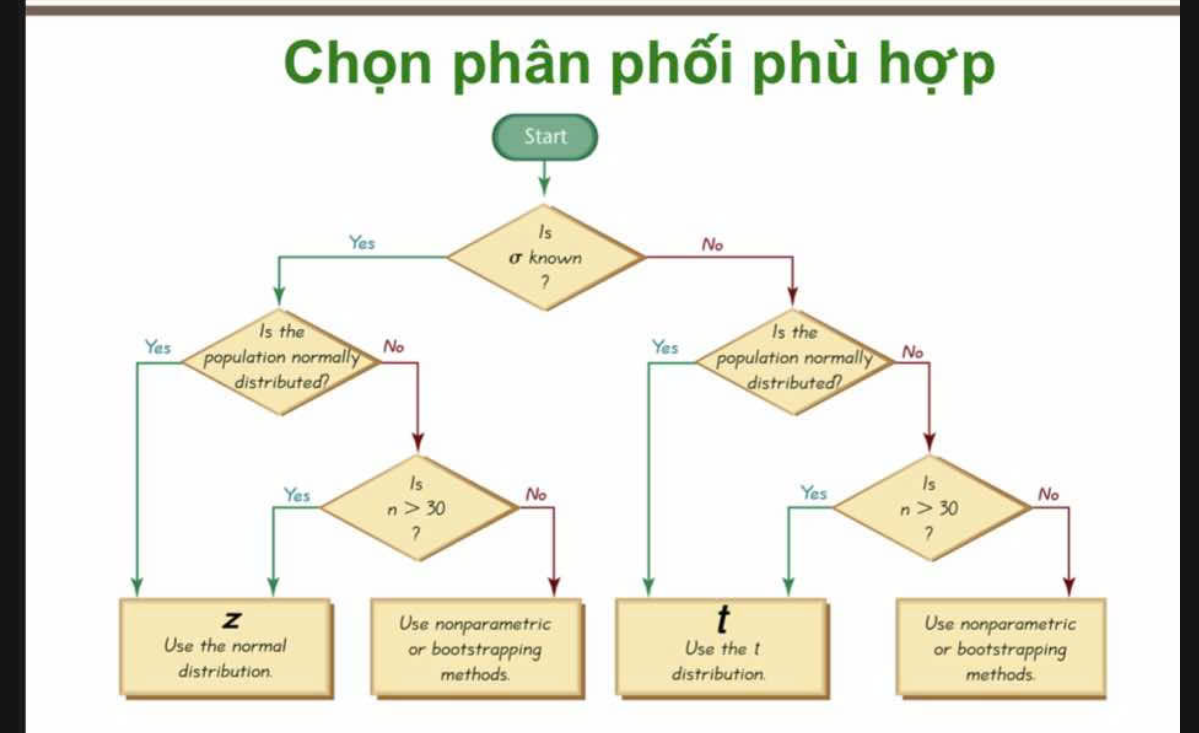

# Phần 2: Kiểm định

## Tổng hợp công thức: 

### 🧪 Công thức tính trị kiểm định (Test Statistic)

| Tên kiểm định            | Công thức trị kiểm định                                               | Ý nghĩa |
|--------------------------|----------------------------------------------------------------------|--------|
| **Z - Trung bình (biết σ)** | $ z = \frac{\bar{x} - \mu_0}{\sigma / \sqrt{n}} $                    | So sánh khi biết độ lệch chuẩn tổng thể |
| **T - Trung bình (không biết σ)** | $ t = \frac{\bar{x} - \mu_0}{s / \sqrt{n}} $ | Khi không biết σ, dùng độ lệch chuẩn mẫu |
| **Z - Tỷ lệ**               | $ z = \frac{\hat{p} - p_0}{\sqrt{p_0(1 - p_0)/n}} $                    | Kiểm định tỷ lệ | 

### 📊 Cách tính p-value theo loại kiểm định

| Loại kiểm định | Dạng kiểm định | Công thức tính p-value (Python)                                   |
|----------------|----------------|---------------------------------------------------------------------|
| **Z (biết σ)** | 2 phía         | `2 * (1 - norm.cdf(abs(z)))`                                       |
|                | Phía trái      | `norm.cdf(z)`                                                      |
|                | Phía phải      | `1 - norm.cdf(z)`                                                  |
| **T (không biết σ)** | 2 phía         | `2 * (1 - t.cdf(abs(t), df=n-1))`                            |
|                | Phía trái      | `t.cdf(t, df=n-1)`                                                 |
|                | Phía phải      | `1 - t.cdf(t, df=n-1)`                                             |

### 🚫 Miền bác bỏ (Vùng từ chối H₀)

| Loại kiểm định      | Dạng kiểm định | Miền bác bỏ (với mức ý nghĩa α)                     |
|---------------------|----------------|-----------------------------------------------------|
| **Z (biết σ)**      | 2 phía         | $|z| > z_{\alpha/2}$                              |
|                     | Phía trái      | $z < -z_{\alpha}$                                 |
|                     | Phía phải      | $z > z_{\alpha}$                                  |
| **T (không biết σ)**| 2 phía         | $|t| > t_{\alpha/2, n-1}$                         |
|                     | Phía trái      | $t < -t_{\alpha, n-1}$                            |
|                     | Phía phải      | $t > t_{\alpha, n-1}$                             |

### 🎯 Công thức tính trị tới hạn (Critical Value)

| Loại kiểm định      | Dạng kiểm định | Công thức trị tới hạn (Python)                                | Ý nghĩa |
|---------------------|----------------|----------------------------------------------------------------|---------|
| **Z (biết σ)**      | 2 phía         | `z_crit = norm.ppf(1 - α/2)`                                   | $z_{\alpha/2} $ |
|                     | Phía trái      | `z_crit = norm.ppf(α)`                                         | $ z_{\alpha} $ (âm) |
|                     | Phía phải      | `z_crit = norm.ppf(1 - α)`                                     | $ z_{\alpha} $ |
| **T (không biết σ)**| 2 phía         | `t_crit = t.ppf(1 - α/2, df=n-1)`                              | $ t_{\alpha/2, n-1} $ |
|                     | Phía trái      | `t_crit = t.ppf(α, df=n-1)`                                    | $ t_{\alpha, n-1} $ (âm) |
|                     | Phía phải      | `t_crit = t.ppf(1 - α, df=n-1)`                                | $ t_{\alpha, n-1} $ |

In [119]:
import numpy as np
import pandas as pd

from scipy import stats
from scipy.stats import t as t_dist
from scipy.stats import norm

import matplotlib.pyplot as plt
import statsmodels.api as sm
import math

In [120]:
df = pd.read_csv("../data/dataKHXH.csv")
df.head()

,sbd,toan,ngu_van,ngoai_ngu,lich_su,dia_li,gdcd,ma_ngoai_ngu
0,1000001,8.4,8.50,9.2,6.75,6.00,9.00,N1
1,1000002,7.2,8.50,9.2,8.75,6.50,8.50,N1
2,1000004,7.8,8.25,7.8,4.50,6.25,8.25,N1
3,1000005,7.2,8.00,7.8,4.75,6.75,8.25,N1
4,1000006,7.6,9.25,9.0,8.50,7.25,9.75,N1


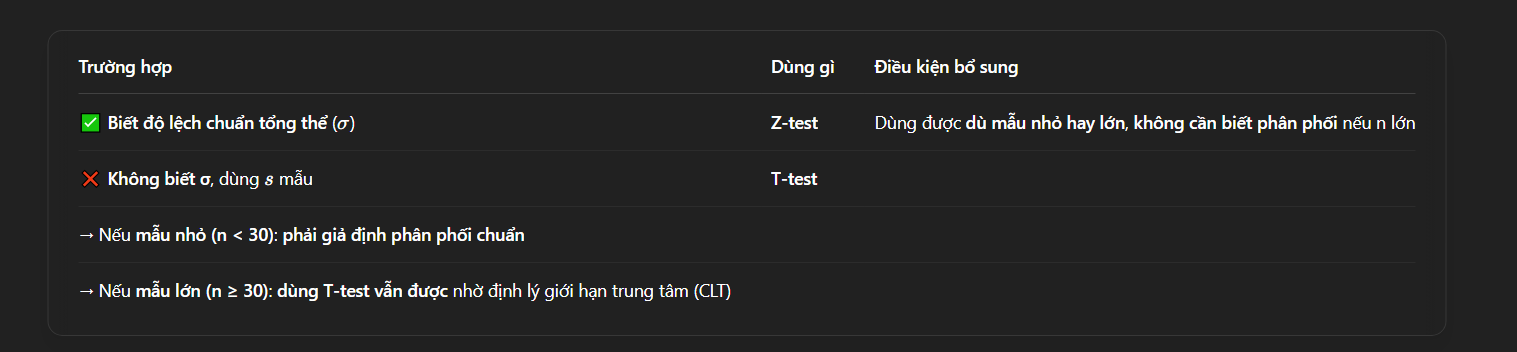

### Đề bài 1:

Trong kỳ thi THPT Quốc gia, điểm môn **Ngữ Văn** của **25 thí sinh** được lấy ngẫu nhiên có **độ lệch chuẩn tổng thể là 1.32**. Hãy ước lượng trung bình điểm môn Ngữ Văn với **độ tin cậy 95%**.


In [121]:
new_df = df["ngu_van"]
new_df.head()

0    8.50
1    8.50
2    8.25
3    8.00
4    9.25
Name: ngu_van, dtype: float64

In [122]:
sigma = 1.32
n = 25

sample = new_df.sample(n, random_state=15)
sample_mean = sample.mean()

print(f"Điểm trung bình của 25 thí sinh là {sample_mean:.2f}.")

Điểm trung bình của 25 thí sinh là 7.00.


Gọi $\mu$ là điểm trung bình môn Ngữ Văn của tập dữ liệu. Ta có, $\bar{x}=7.00$ là điểm trung bình môn Ngữ Văn của 25 thí sinh.


Biết σ => Dùng Z-Test dù mẫu nhỏ (n < 30).

Khoảng tin cậy được tính bằng công thức:

$$
CI = \left[ \bar{x} - Z_{\alpha/2} \times \frac{\sigma}{\sqrt{n}}, \; \bar{x} + Z_{\alpha/2} \times \frac{\sigma}{\sqrt{n}} \right]
$$

In [123]:
alpha = 1 - 0.95
z_value = stats.norm.ppf(1 - alpha / 2)

print("Trong đó:\n")
print("────────────────────────────────────────────────────")
print(f"Trung bình mẫu (x̄): {sample_mean:.4f}")
print(f"Độ tin cậy 95%: 1 - α = {alpha:.2f}")
print(f"Z-value (95%): {z_value:.2f}")
print(f"Độ lệch chuẩn tổng thể (σ): {sigma:.2f}")
print("────────────────────────────────────────────────────")


Trong đó:

────────────────────────────────────────────────────
Trung bình mẫu (x̄): 7.0000
Độ tin cậy 95%: 1 - α = 0.05
Z-value (95%): 1.96
Độ lệch chuẩn tổng thể (σ): 1.32
────────────────────────────────────────────────────


In [124]:
margin_of_error = z_value * (sigma / np.sqrt(n))
lower_bound = sample_mean - margin_of_error
upper_bound = sample_mean + margin_of_error

print("────────────────────────────────────────────────────")
print(f"Z-value của phân phối chuẩn với độ tin cậy {1-alpha:.2%} là {z_value:.2f}.")
print("Khoảng tin cậy 95% (dùng Z-Test):")
print(f"({lower_bound}, {upper_bound})")
print("────────────────────────────────────────────────────")

────────────────────────────────────────────────────
Z-value của phân phối chuẩn với độ tin cậy 95.00% là 1.96.
Khoảng tin cậy 95% (dùng Z-Test):
(6.482569508081426, 7.517430491918574)
────────────────────────────────────────────────────


Vậy khoảng giá trị trung bình thật là: (6.48:7.52) với khoảng tin cậy 95%

### Đề bài 2:

Trong kỳ thi THPT Quốc gia, điểm môn **Toán** của **20 thí sinh** được lấy ngẫu nhiên. Giả sử **không biết độ lệch chuẩn tổng thể (σ)**. Hãy **ước lượng trung bình** điểm môn Toán với **độ tin cậy 99%**.  

In [125]:
new_df = df["toan"]
new_df.head()

0    8.4
1    7.2
2    7.8
3    7.2
4    7.6
Name: toan, dtype: float64

In [126]:
n = 20

sample = new_df.sample(n, random_state=15)
sample_mean = sample.mean()

print(f"Điểm trung bình của {n} thí sinh là {sample_mean:.2f}.")

Điểm trung bình của 20 thí sinh là 6.19.


Gọi $\mu$ là điểm trung bình môn Toán của tập dữ liệu. Ta có, $\bar{x}=6.19$ là điểm trung bình môn Toán của 20 thí sinh.


Không biết σ, mẫu nhỏ (n < 30), giả sử mẫu có phân phối chuẩn => Dùng t-Test với bậc tự do là n-1, ta có khoảng tin cậy được tính bằng công thức:

$$
CI = \left[ \bar{x} - t_{n-1;1-\frac{\alpha}{2}} \times \frac{s}{\sqrt{n}}, \; \bar{x} + t_{n-1;1-\frac{\alpha}{2}} \times \frac{s}{\sqrt{n}} \right]
$$


In [127]:
alpha = 1 - 0.99
t_value = stats.t.ppf(1 - alpha / 2, n - 1)
sample_std = sample.std(ddof=1)

print("Trong đó:")
print("────────────────────────────────────────────────────")
print(f"Trung bình mẫu (x̄): {sample_mean:.4f}")
print(f"Độ tin cậy 99%: 1 - α = {1 - alpha:.2%}")
print(f"T-value (99%): {t_value:.2f}")
print(f"Độ lệch chuẩn mẫu (s): {sample_std:.4f}")
print("────────────────────────────────────────────────────")


Trong đó:
────────────────────────────────────────────────────
Trung bình mẫu (x̄): 6.1900
Độ tin cậy 99%: 1 - α = 99.00%
T-value (99%): 2.86
Độ lệch chuẩn mẫu (s): 1.5674
────────────────────────────────────────────────────


In [128]:
margin_of_error = t_value * (sample_std / np.sqrt(n))
lower_bound = sample_mean - margin_of_error
upper_bound = sample_mean + margin_of_error

print("────────────────────────────────────────────────────")
print(f"Khoảng tin cậy 99% (dùng t-Test): ({lower_bound:.2f}, {upper_bound:.2f})")
print("────────────────────────────────────────────────────")

────────────────────────────────────────────────────
Khoảng tin cậy 99% (dùng t-Test): (5.19, 7.19)
────────────────────────────────────────────────────


Vậy khoảng giá trị trung bình thật là: (5.46:6.92) với khoảng tin cậy 99%

### Đề bài 3:

Điểm môn **Lịch Sử** của **50 thí sinh** được lấy ngẫu nhiên. Giả sử **biết độ lệch chuẩn tổng thể (σ) = 1.5**. Hãy **ước lượng trung bình** điểm môn Lịch Sử với **độ tin cậy 90%**. 

In [129]:
new_df = df["lich_su"]
new_df.head()

0    6.75
1    8.75
2    4.50
3    4.75
4    8.50
Name: lich_su, dtype: float64

In [130]:
sigma = 1.5
n = 50

sample = new_df.sample(n, random_state=15)
sample_mean = sample.mean()

print(f"Điểm trung bình của {n} thí sinh là {sample_mean:.2f}.")

Điểm trung bình của 50 thí sinh là 6.04.


Gọi $\mu$ là điểm trung bình môn Lịch Sử của tập dữ liệu. Ta có, $\bar{x}=6.04$ là điểm trung bình môn Lịch sử của 50 thí sinh.


Biết σ, mẫu lớn (n > 30) => Dùng Z-Test.

Khoảng tin cậy được tính bằng công thức:

$$
CI = \left[ \bar{x} - Z_{\alpha/2} \times \frac{\sigma}{\sqrt{n}}, \; \bar{x} + Z_{\alpha/2} \times \frac{\sigma}{\sqrt{n}} \right]
$$

In [131]:
alpha = 1 - 0.90
z_value = stats.norm.ppf(1 - alpha / 2)

print("Trong đó:")
print("────────────────────────────────────────────────────")
print(f"Trung bình mẫu (x̄): {sample_mean:.4f}")
print(f"Độ tin cậy 95%: 1 - α = {alpha:.2f}")
print(f"Z-value (95%): {z_value:.2f}")
print(f"Độ lệch chuẩn tổng thể (σ): {sigma:.2f}")
print("────────────────────────────────────────────────────")


Trong đó:
────────────────────────────────────────────────────
Trung bình mẫu (x̄): 6.0450
Độ tin cậy 95%: 1 - α = 0.10
Z-value (95%): 1.64
Độ lệch chuẩn tổng thể (σ): 1.50
────────────────────────────────────────────────────


In [132]:
margin_of_error = z_value * (sigma / np.sqrt(n))
lower_bound = sample_mean - margin_of_error
upper_bound = sample_mean + margin_of_error

print("────────────────────────────────────────────────────")
print(f"Z-value của phân phối chuẩn với độ tin cậy {1-alpha:.2%} là {z_value:.2f}.")
print("Khoảng tin cậy 95% (dùng Z-Test):")
print(f"({lower_bound}, {upper_bound})")
print("────────────────────────────────────────────────────")

────────────────────────────────────────────────────
Z-value của phân phối chuẩn với độ tin cậy 90.00% là 1.64.
Khoảng tin cậy 95% (dùng Z-Test):
(5.696073853896998, 6.393926146103002)
────────────────────────────────────────────────────


Vậy khoảng giá trị trung bình thật là: (5.96:6.39) với khoảng tin cậy 90%

### Đề bài 4:

Điểm môn **Địa Lý** của **100 thí sinh** được lấy ngẫu nhiên. Giả sử **không biết độ lệch chuẩn tổng thể (σ)**. Hãy **ước lượng trung bình** điểm môn Địa Lý với **độ tin cậy 95%**. 

In [133]:
new_df = df["dia_li"]
new_df.head()

0    6.00
1    6.50
2    6.25
3    6.75
4    7.25
Name: dia_li, dtype: float64

In [134]:
n = 100

sample = new_df.sample(n, random_state=15)
sample_mean = sample.mean()

print(f"Điểm trung bình của {n} thí sinh là {sample_mean:.2f}.")

Điểm trung bình của 100 thí sinh là 6.21.


Gọi $\mu$ là điểm trung bình môn Địa Lí của tập dữ liệu. Ta có, $\bar{x}=6.21$ là điểm trung bình môn Toán của 100 thí sinh.


Không biết σ, mẫu lớn (n > 30), Theo định lý **Giới hạn Trung tâm** phân phối t-Student trở nên gần giống hơn với phân phối chuẩn Z => Dùng t-Test với bậc tự do là n-1, ta có khoảng tin cậy được tính bằng công thức:

$$
CI = \left[ \bar{x} - t_{n-1;1-\frac{\alpha}{2}} \times \frac{s}{\sqrt{n}}, \; \bar{x} + t_{n-1;1-\frac{\alpha}{2}} \times \frac{s}{\sqrt{n}} \right]
$$


In [135]:
alpha = 1 - 0.95
t_value = stats.t.ppf(1 - alpha / 2, n - 1)
sample_std = sample.std(ddof=1)

print("Trong đó:")
print("────────────────────────────────────────────────────")
print(f"Trung bình mẫu (x̄): {sample_mean:.4f}")
print(f"Độ tin cậy 99%: 1 - α = {1 - alpha:.2%}")
print(f"T-value (99%): {t_value:.2f}")
print(f"Độ lệch chuẩn mẫu (s): {sample_std:.4f}")
print("────────────────────────────────────────────────────")


Trong đó:
────────────────────────────────────────────────────
Trung bình mẫu (x̄): 6.2050
Độ tin cậy 99%: 1 - α = 95.00%
T-value (99%): 1.98
Độ lệch chuẩn mẫu (s): 1.1445
────────────────────────────────────────────────────


In [136]:
margin_of_error = t_value * (sample_std / np.sqrt(n))
lower_bound = sample_mean - margin_of_error
upper_bound = sample_mean + margin_of_error

print("────────────────────────────────────────────────────")
print(f"Khoảng tin cậy 99% (dùng t-Test): ({lower_bound:.2f}, {upper_bound:.2f})")
print("────────────────────────────────────────────────────")

────────────────────────────────────────────────────
Khoảng tin cậy 99% (dùng t-Test): (5.98, 6.43)
────────────────────────────────────────────────────


Vậy khoảng giá trị trung bình thật là: (5.98:6.43) với khoảng tin cậy 95%

# Dạng 5: Ước lượng tỷ lệ

## Đề bài 1

Ước lượng tỷ lệ học sinh đạt trung bình môn Toán (≥ 5 điểm). Lấy mẫu ngẫu nhiên **500 học sinh** từ bộ dữ liệu. Xét **tỷ lệ học sinh có điểm môn Toán từ 5 trở lên** (≥ 5). Tính **khoảng tin cậy 95%** cho **tỷ lệ học sinh đạt trung bình**.

In [137]:
new_df = df["toan"]
new_df.head()

0    8.4
1    7.2
2    7.8
3    7.2
4    7.6
Name: toan, dtype: float64

In [138]:
n = 500
sample = new_df.sample(n, random_state=15)
x = (sample >= 5).sum()
p_hat = x / n

np_ = n * p_hat
nq_ = n * (1 - p_hat)

print("────────────────────────────────────────────────────────")
print(f"Số mẫu (n): {n}")
print(f"Số đạt điều kiện (x ≥ 5): {x}")
print(f"Tỷ lệ mẫu (p̂): {p_hat:.4f}")
print(f"n * p̂ = {np_:.2f}")
print(f"n * (1 - p̂) = {nq_:.2f}")
print("────────────────────────────────────────────────────────")

────────────────────────────────────────────────────────
Số mẫu (n): 500
Số đạt điều kiện (x ≥ 5): 367
Tỷ lệ mẫu (p̂): 0.7340
n * p̂ = 367.00
n * (1 - p̂) = 133.00
────────────────────────────────────────────────────────


- Điểm thi của các thí sinh trên trung bình hay không là độc lập với nhau nên tỉ lệ thí sinh đạt điểm trên trung bình tuân theo phân phối nhị thức.
- Ta có
    - $\hat{p}=0.7340$, $n\hat{p} = 367 \geq 5$
    - $n(1-\hat{p}) = 133 \geq 5$
    
=> Vậy phân phối nhị thức của tỷ lệ mẫu có thể xấp xỉ bằng phân phối chuẩn. Ta có khoảng tin cậy được tính bằng công thức:

$$
CI = \left[ \hat{p} - Z_{\alpha/2} \cdot \sqrt{ \frac{\hat{p}(1 - \hat{p})}{n} },\; \hat{p} + Z_{\alpha/2} \cdot \sqrt{ \frac{\hat{p}(1 - \hat{p})}{n} } \right]
$$

In [139]:
alpha = 1 - 0.95
z_value = norm.ppf(1 - alpha/2)


print("Trong đó:")
print("────────────────────────────────────────────────────")
print(f"Tỷ lệ mẫu (p̂): {p_hat:.4f}")
print(f"Độ tin cậy 95%: 1 - α = {1 - alpha:.2%}")
print(f"Z-value (95%): {z_value:.2f}")
print("────────────────────────────────────────────────────")

Trong đó:
────────────────────────────────────────────────────
Tỷ lệ mẫu (p̂): 0.7340
Độ tin cậy 95%: 1 - α = 95.00%
Z-value (95%): 1.96
────────────────────────────────────────────────────


In [140]:
margin_error = z_value * np.sqrt(p_hat * (1 - p_hat) / n)
lower_bound = p_hat - margin_error
upper_bound = p_hat + margin_error

print("────────────────────────────────────────────────────")
print(f"Khoảng tin cậy 95% (dùng z-Test): ({lower_bound:.2f}, {upper_bound:.2f})")
print("────────────────────────────────────────────────────")

────────────────────────────────────────────────────
Khoảng tin cậy 95% (dùng z-Test): (0.70, 0.77)
────────────────────────────────────────────────────


Vậy khoảng giá trị trung bình thật là: (0.7:0.77) với khoảng tin cậy 95%

## Đề Bài 2:

Ước lượng **tỷ lệ học sinh đạt điểm trung bình môn GDCD (≥ 5 điểm)**. Lấy mẫu ngẫu nhiên **400 học sinh** từ bộ dữ liệu. Xét **tỷ lệ học sinh có điểm môn GDCD từ 7 trở lên** (≥ 7). Tính **khoảng tin cậy 95%** cho **tỷ lệ học sinh đạt trung bình**.


In [142]:
new_df = df["gdcd"]
new_df.head()

0    9.00
1    8.50
2    8.25
3    8.25
4    9.75
Name: gdcd, dtype: float64

In [143]:
n = 400
sample = new_df.sample(n, random_state=15)
x = (sample >= 7).sum()
p_hat = x / n

np_ = n * p_hat
nq_ = n * (1 - p_hat)

print("────────────────────────────────────────────────────────")
print(f"Số mẫu (n): {n}")
print(f"Số đạt điều kiện (x ≥ 7): {x}")
print(f"Tỷ lệ mẫu (p̂): {p_hat:.4f}")
print(f"n * p̂ = {np_:.2f}")
print(f"n * (1 - p̂) = {nq_:.2f}")
print("────────────────────────────────────────────────────────")

────────────────────────────────────────────────────────
Số mẫu (n): 400
Số đạt điều kiện (x ≥ 7): 357
Tỷ lệ mẫu (p̂): 0.8925
n * p̂ = 357.00
n * (1 - p̂) = 43.00
────────────────────────────────────────────────────────


- Điểm thi của các thí sinh trên trung bình hay không là độc lập với nhau nên tỉ lệ thí sinh đạt điểm trên trung bình tuân theo phân phối nhị thức.
- Ta có
    - $\hat{p}=0.8925$, $n\hat{p} = 357.00 \geq 5$
    - $n(1-\hat{p}) = 43.00 \geq 5$
    
=> Vậy phân phối nhị thức của tỷ lệ mẫu có thể xấp xỉ bằng phân phối chuẩn. Ta có khoảng tin cậy được tính bằng công thức:

$$
CI = \left[ \hat{p} - Z_{\alpha/2} \cdot \sqrt{ \frac{\hat{p}(1 - \hat{p})}{n} },\; \hat{p} + Z_{\alpha/2} \cdot \sqrt{ \frac{\hat{p}(1 - \hat{p})}{n} } \right]
$$

In [144]:
alpha = 1 - 0.95
z_value = norm.ppf(1 - alpha/2)


print("Trong đó:")
print("────────────────────────────────────────────────────")
print(f"Tỷ lệ mẫu (p̂): {p_hat:.4f}")
print(f"Độ tin cậy 99%: 1 - α = {1 - alpha:.2%}")
print(f"Z-value (99%): {z_value:.2f}")
print("────────────────────────────────────────────────────")

Trong đó:
────────────────────────────────────────────────────
Tỷ lệ mẫu (p̂): 0.8925
Độ tin cậy 99%: 1 - α = 95.00%
Z-value (99%): 1.96
────────────────────────────────────────────────────


In [145]:
margin_error = z_value * np.sqrt(p_hat * (1 - p_hat) / n)
lower_bound = p_hat - margin_error
upper_bound = p_hat + margin_error

print("────────────────────────────────────────────────────")
print(f"Khoảng tin cậy 99% (dùng z-Test): ({lower_bound:.2f}, {upper_bound:.2f})")
print("────────────────────────────────────────────────────")

────────────────────────────────────────────────────
Khoảng tin cậy 99% (dùng z-Test): (0.86, 0.92)
────────────────────────────────────────────────────


Vậy khoảng giá trị trung bình thật là: (0.86:0.92) với khoảng tin cậy 95%